# Importing Dependencies

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('originalheart.csv')

In [3]:
df.sample(5)

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
122,51.0,1.0,3.0,100.0,222.0,0.0,0.0,143.0,1.0,1.2,2.0,0.0,3.0,0
233,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0
74,44.0,1.0,4.0,110.0,197.0,0.0,2.0,177.0,0.0,0.0,1.0,1.0,3.0,1
126,56.0,0.0,4.0,200.0,288.0,1.0,2.0,133.0,1.0,4.0,3.0,2.0,7.0,3
151,42.0,0.0,4.0,102.0,265.0,0.0,2.0,122.0,0.0,0.6,2.0,0.0,3.0,0


# Cleaning Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   tresbps  303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  target   303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [5]:
df.replace('?', np.nan, inplace = True)

In [6]:
df.isnull().sum()

age        0
sex        0
cp         0
tresbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         4
thal       2
target     0
dtype: int64

In [7]:
df = df.apply(pd.to_numeric, errors = 'coerce')

In [8]:
df.fillna(df.mean(), inplace = True)

In [9]:
df['target'] = df['target'].apply(lambda x: 1 if x in [1,2,3,4]else 0)

In [10]:
df['target'].value_counts()

target
0    164
1    139
Name: count, dtype: int64

In [11]:
df['ca'] = df['ca'].astype('int64')
df['thal'] = df['thal'].astype('int64')

# Splitting Data

In [12]:
X = df.drop(columns = 'target')
y = df['target']

In [13]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [14]:
dt_clf = DecisionTreeClassifier(max_depth = 3, splitter = 'random', min_samples_split = 8,min_samples_leaf=10,
                               max_leaf_nodes = 8)

# Applying DT

When Using DT with hyper parameters (max_depth = 3, splitter = 'random', min_samples_split = 8,min_samples_leaf=10,
max_leaf_nodes = 8) it gives an accuracy between 84 to 93 on test data and 82 to 84 on training data

In [15]:
dt_clf.fit(X_train, y_train)

In [16]:
# y_pred = dt_clf.predict(X_test)

Mean Accuracy: 0.8429508196721313
Standard Deviation: 0.04399921818953122
Minimum Accuracy: 0.7213114754098361
Maximum Accuracy: 0.9016393442622951


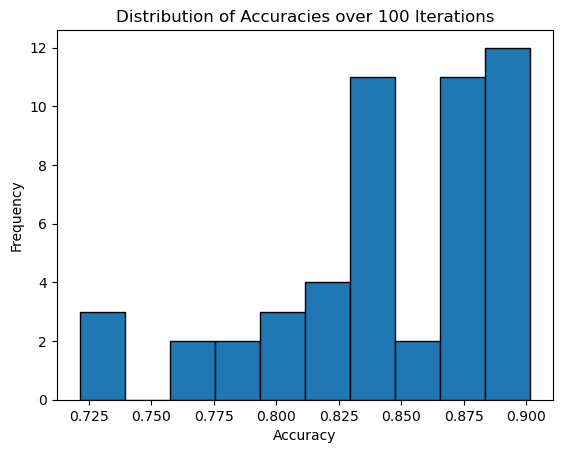

In [17]:
iterations = 50
accuracies = []

for i in range(iterations):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
    dt_clf.fit(X_train, y_train)
    y_pred = dt_clf.predict(X_test)

    accuracy = accuracy_score(y_pred, y_test)
    accuracies.append(accuracy)
    
    
accuracies = np.array(accuracies)

print(f"Mean Accuracy: {accuracies.mean()}")
print(f"Standard Deviation: {accuracies.std()}")
print(f"Minimum Accuracy: {accuracies.min()}")
print(f"Maximum Accuracy: {accuracies.max()}")


import matplotlib.pyplot as plt

plt.hist(accuracies, bins=10, edgecolor='k')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracies over 100 Iterations')
plt.show()
    

In [18]:
from sklearn import tree

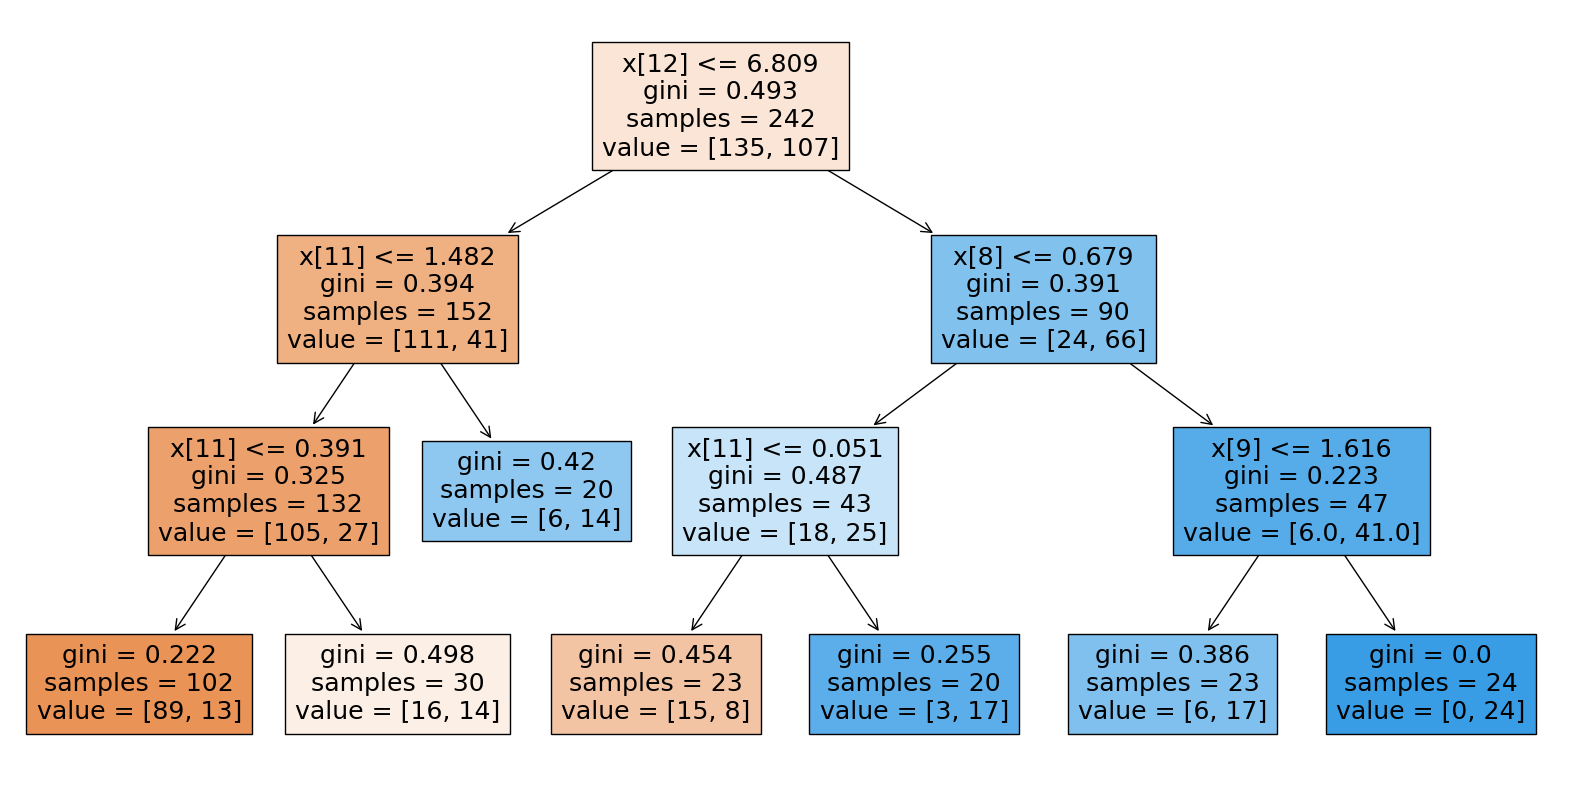

In [19]:
plt.figure(figsize = (20,10))
tree.plot_tree(dt_clf, filled =True)
plt.show()

# With PCA and Standard Scaler

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [21]:
# Applying Standard Scaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [22]:
# Taking n_components in PCA
pca = PCA(n_components = 8)

In [23]:
# Transforming Data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [24]:
dt_clf = DecisionTreeClassifier(max_depth = 3, splitter = 'random', min_samples_split = 8,min_samples_leaf=10,
                               max_leaf_nodes = 8)

In [25]:
dt_clf.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8, min_samples_leaf=10,
                       min_samples_split=8, splitter='random')

In [27]:
y_pred = dt_clf.predict(X_test_pca)

In [28]:
print("Accuracy score with pca is ", accuracy_score(y_pred , y_test))

Accuracy score with pca is  0.7213114754098361


In [30]:
y_train_pred = dt_clf.predict(X_train_pca)
print("Accuracy score with pca is ", accuracy_score(y_train_pred , y_train))

Accuracy score with pca is  0.743801652892562


# Using Cross Validation KFold

In [31]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(dt_clf, X_train, y_train, cv=kf, scoring='accuracy')

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation: {cv_scores.std():.4f}')


Cross-Validation Scores: [0.73469388 0.73469388 0.79166667 0.79166667 0.77083333]
Mean Accuracy: 0.7647
Standard Deviation: 0.0257


With Using KFold Cross Validation we can achieve a "Mean Accuracy of 74 to 81%" by using n_split parameter = 5. and with the following decision Tree Hyper parameters (max_depth = 3, splitter = 'random', min_samples_split = 8,min_samples_leaf=10, max_leaf_nodes = 8)

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
dt_clf_gsv = DecisionTreeClassifier(random_state = 42)


param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter' : ['best', 'random']
}

grid_search = GridSearchCV(estimator=dt_clf_gsv, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score:.4f}')

# Evaluating the model on the test data
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best Cross-Validation Score: 0.8015
Test Accuracy: 0.8852


# Using Ensemble Learning